# P10 Détectez des faux billets avec Python 

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

from sklearn.linear_model import LinearRegression


# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Import de la fonction d'évaluation de l'algorithme  
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")
from functions_OC_fr import *

# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#Importation des données
billets= pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 10 Détectez des faux billets avec R ou Python\Données\donnees_billets.csv',delimiter=";")
df=billets.copy()

#Aperçu des données 
df.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Analyse exploratoire des données

In [3]:
#Structure du jeu de données
df.shape

(1500, 7)

In [4]:
#Types des variables
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [5]:
#Apperçu des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
#Affichage du nombre de vrais et faux billets 
df["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [7]:
#Affichage des billets vrais
genuine= df.loc[df['is_genuine']==True]
genuine.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [8]:
#Affichage des principales caractéristiques des vrais billets 
genuine.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [9]:
#Affichage des faux billets
not_genuine= df.loc[df['is_genuine']==False]
not_genuine.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72


In [10]:
#Affichage des principales caractéristiques des faux billets
not_genuine.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


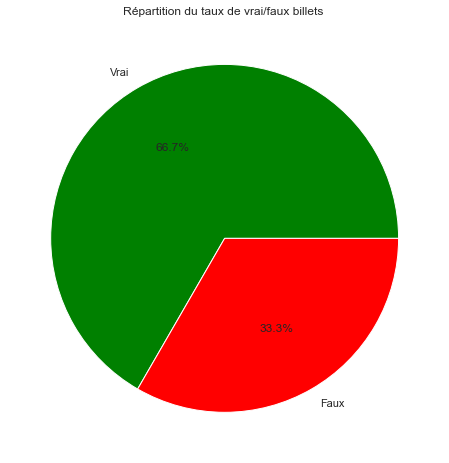

In [11]:
#Affichage du taux de répartition de Vrais/Faux billets

fig = plt.figure(figsize=(8, 8))

labels=['Vrai','Faux']
colors=['green', 'red']

plt.pie(df['is_genuine'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Répartition du taux de vrai/faux billets ')
plt.show()

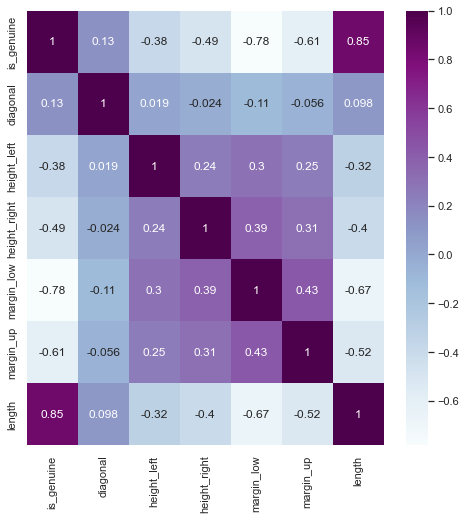

In [12]:
# On affiche la matrice de corrélation de notre df

plt.figure(figsize=(8, 8))

sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.show()

La variable margin_low est corrélée négativement à la variable length et is_genuine


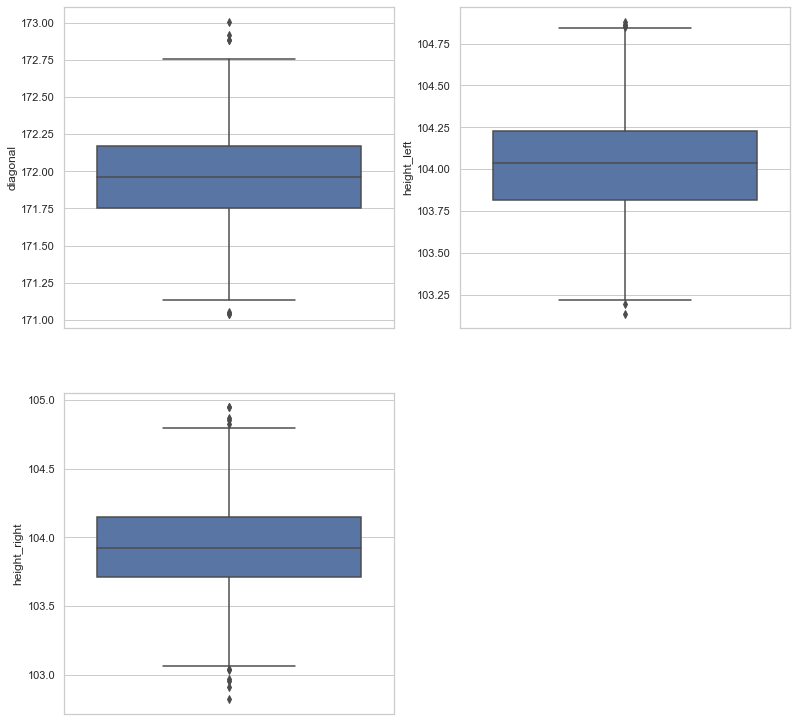

In [13]:
# Visualisation graphique en boxplot de la dispersion des valeurs pour toutes les variables
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df,  y='diagonal')
plt.subplot(222)
sns.boxplot(data=df,  y='height_left')
plt.subplot(223)
sns.boxplot(data=df,  y='height_right');

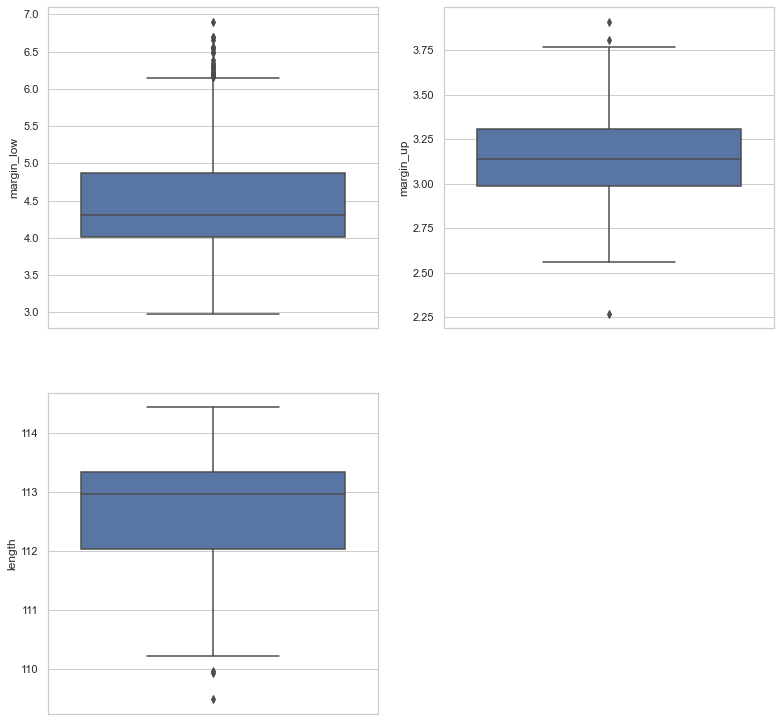

In [14]:
# Visualisation graphique en boxplot de la dispersion des valeurs pour toutes les variables
plt.figure(figsize=(13, 13))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df,  y='margin_low')
plt.subplot(222)
sns.boxplot(data=df,  y='margin_up')
plt.subplot(223)
sns.boxplot(data=df,  y='length');

<Figure size 576x576 with 0 Axes>

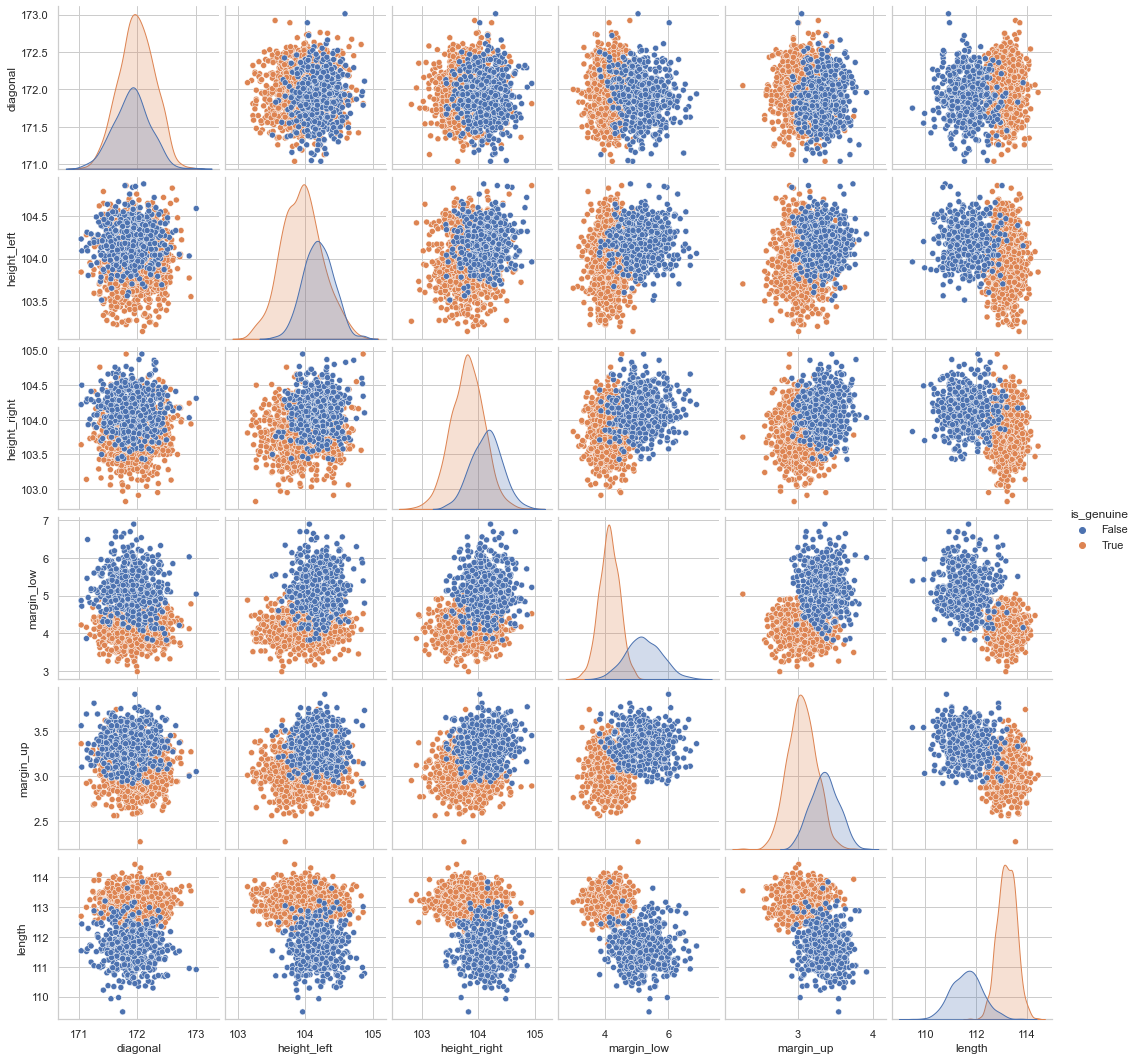

In [15]:
#Affichage de la matrice de diagrammes de dispersion

fig = plt.figure(figsize=(8, 8))

sns.pairplot(df, hue='is_genuine')
plt.show();

In [16]:
#Afficher toute les colonnes qui ont des floats
for col in df.select_dtypes("float"):
    print(col)

diagonal
height_left
height_right
margin_low
margin_up
length


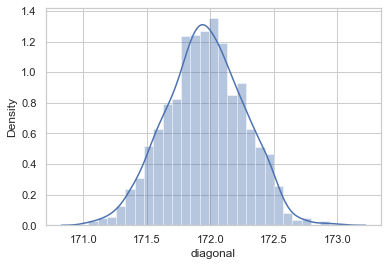

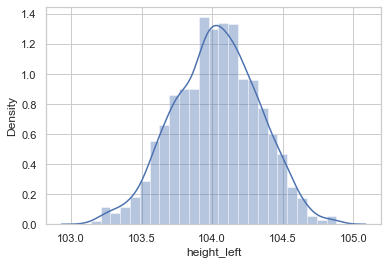

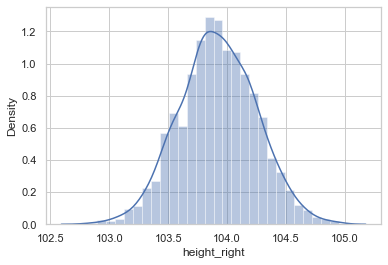

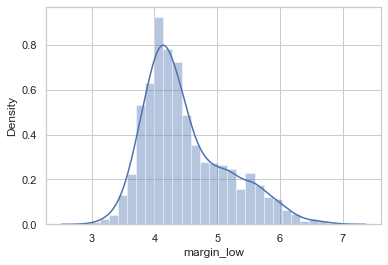

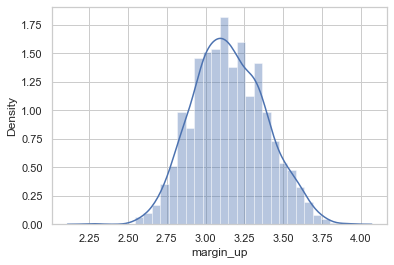

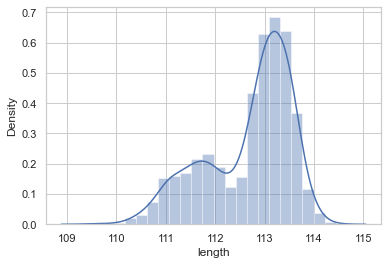

In [17]:
#Afficher la distribution des différentes variables
for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

La plupart de nos variables ont l'air de suivre une distribution normale

In [18]:
#Pour pouvoir utiliser toutes les données lors de nos analyses, on convertit la colonne is_genuine BOOL en INT 

df['is_genuine']=df['is_genuine'].astype(int)

In [19]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


- Le billet est vrai si is_genuine = 1
- Le billet est faux si is_genuine = 0

## Les valeurs manquantes 

In [20]:
#Recherche de valeurs manquantes
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

La variable margin_low a 37 valeurs manquantes

In [21]:
#Affichage du pourcentage de valeurs manquantes
print('% de valeurs manquantes')
display(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False))

#Recherche de valeurs en double 
print('valeurs en double')
display(df.duplicated().sum())

#Structure du df
display(df.shape)

% de valeurs manquantes


margin_low      2.466667
is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_up       0.000000
length          0.000000
dtype: float64

valeurs en double


0

(1500, 7)

Les données manquantes pour margin_low sont négligeables ~2.47% mais nous allons suivre le conseil du collègue et effectuer une imputation des valeurs manquantes par régression linéaire

# Traitement des valeurs manquantes par régression linéaire multiple

## Séparation des données en deux dataframes

- Création df_manquants : df des valeurs manquantes où on retire la colonne margin_low avec lequel nous effectuerons la régression linéaire multiple 

- Création df_sans_manquants : df sans les valeurs manquantes avec lequel nous complèterons les données manquantes pour reconstituer notre jeu de données


In [22]:
#Création df des valeurs manquantes où on retire la colonne margin_low 
df_manquants= df[df["margin_low"].isnull()] 
df_manquants= df_manquants.drop("margin_low", axis=1)  #variables à imputer
df_manquants.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length
72,1,171.94,103.89,103.45,3.25,112.79
99,1,171.93,104.07,104.18,3.14,113.08
151,1,172.07,103.80,104.38,3.02,112.93
197,1,171.45,103.66,103.80,3.62,113.27
241,1,171.83,104.14,104.06,3.02,112.36


In [23]:
#Structure de df_manquants
df_manquants.shape

(37, 6)

In [24]:
# df sans valeurs manquantes qu'on utilisera pour notre analyse
df_sans_manquants = df.dropna()
df_sans_manquants.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


### Standardisation des variables sans données manquantes

is_genuine est la variable résultante de toutes les autres varaibles pour définir si le billet est vrai ou faux. Donc on la retire de la regression linéaire pour éviter une fuite de données

En effet, si jamais dans le jeu de test final nous avions des données manquantes alors que le but du projet est de prédire is_genuine (billet Vrai/Faux), il y aurait fuite de données et donc incohérence dans le modèle.

Pour éviter cela, nous devons suivre les best practices et retirer is_genuine du modèle.

In [25]:
# Sélection des colonnes à utiliser pour la régression et on retire is_genuine 
colonnes = ["diagonal", "height_left", "height_right", "margin_up", "length","margin_low"]


In [26]:
#Standardisation des données
scaler = StandardScaler()
df_sans_manquants_std = scaler.fit_transform(df_sans_manquants[colonnes])

# Regression linéaire


In [27]:
#Affichage des données standardisées 
df_sans_manquants_std

array([[-0.48859357,  2.76680735,  3.17376615, -1.13698239,  0.17784229,
         0.05128623],
       [-1.63480853, -2.24148961, -0.80685073, -0.7048056 ,  0.47569209,
        -1.07893701],
       [ 2.39331832,  1.49803879, -1.30057066, -0.92089399,  0.55588243,
        -0.12954949],
       ...,
       [-0.52134257, -0.07122759,  0.61259405,  0.89424851, -0.83026476,
         1.5431809 ],
       [ 0.3301314 ,  0.83026586,  0.42744908,  1.32642529, -0.4865919 ,
         1.03081304],
       [-1.60205953,  0.39621346, -0.31313081,  0.93746618, -0.69279562,
         0.2170523 ]])

In [28]:
colonnes

['diagonal',
 'height_left',
 'height_right',
 'margin_up',
 'length',
 'margin_low']

In [29]:
# Modélisation de la regression linéaire
mod1 = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=pd.DataFrame(df_sans_manquants_std, columns=colonnes)).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.60e-202
Time:                        14:41:40   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.658e-15      0.019   -1.4e-13   

- Toutes les variables sont significatives car toutes les variables ont une P-Value inférieure à 0.05
 
- Le modèle de regression linéaire a une précision assez moyenne avec un R² = 47.70% et un R² ajusté= 47.60%
- Malgré tout, étant donné qu'on va suivre le conseil du collègue et réaliser notre imputation des valeurs manquantes par régression linéaire, nous décidons tout de même d'utiliser ce modèle.


### Retrait des outliers

Recherche d'outliers pour toutes les variables significatives

In [30]:
#Calcul de IQR (interquartile)
bornes = {}
for colonne in df.columns:
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    bornes[colonne] = (borne_inf, borne_sup)

In [31]:
# On exclu les outliers de chaque colonne
df_sans_outliers = df.copy()
for colonne in df.columns:
    borne_inf, borne_sup = bornes[colonne]
    df_sans_outliers = df_sans_outliers[(df_sans_outliers[colonne] >= borne_inf) & (df_sans_outliers[colonne] <= borne_sup)]

# Création du modèle de régression linéaire 

In [32]:
#Modèle de régression linéaire retenu
X = df_sans_outliers.drop("margin_low", axis=1)

X_train_reg_lin =  sm.add_constant(X)
y = df_sans_outliers['margin_low']

model_reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=pd.DataFrame(df_sans_outliers, columns=colonnes)).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):          2.60e-202
Time:                        14:41:40   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.658e-15      0.019   -1.4e-13   

# Analyse des résultats : Vérification des hypothèses pour utiliser le modèle de régression linéaire

- On vérifie d'abord l'influence des valeurs atypiques

L'utilisation de la Régression Linéaire suppose la vérification de plusieurs hypothèses:
- Normalité : Les résidus doivent suivre une distribution normale.
- Indépendance : Les résidus doivent être indépendants les uns des autres.
- Linéarité : La relation entre la variable dépendante et les variables indépendantes doit être linéaire.
- Homoscédasticité : La variance des résidus doit être constante pour toutes les valeurs des variables indépendantes.


## Vérification de l'influence des valeurs atypiques

- On doit vérifier si nos observations ont potentiellement une influence disproportionnée 
- Nous allons ici réaliser les tests à un niveau 𝛼=5% :

In [33]:
#Récupérons le nombre d'individus de l'échantillon, et le nombre de variables.
alpha=0.05
n = df_sans_outliers.shape[0]
p = 6

### Calcul des leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de  $2∗\frac{p}{n}$.

In [34]:
#Création d'un df analyses
analyses = pd.DataFrame({'obs':np.arange(1,n+1)},
                        index=df_sans_outliers.index.tolist())


In [35]:
#Création des leviers
analyses['levier'] = model_reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

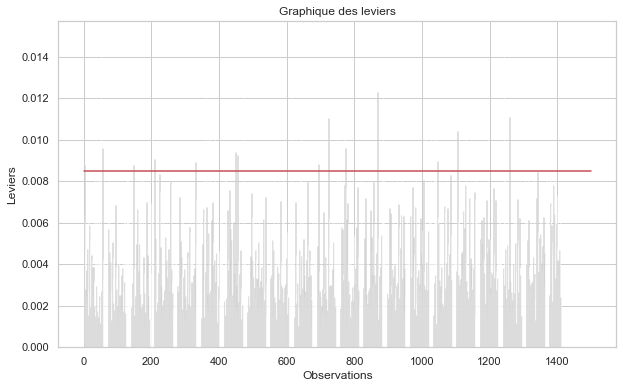

In [36]:
# Graphique des leviers
plt.figure(figsize=(10, 6))
analyses = analyses.sort_values('obs', ascending=True) # trier les données par ordre croissant
plt.bar(analyses['obs'], analyses['levier'], color='black', alpha=0.5)
plt.xlabel('Observations')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.title('Graphique des leviers')
plt.show()

In [37]:
# Les points qui ont un levier supérieur au seuil de levier
outliers_potentiels= analyses.loc[analyses['levier'] > seuil_levier, :]
outliers_potentiels= outliers_potentiels.sort_values('levier',ascending= False)
display(outliers_potentiels.head(5))
display(outliers_potentiels.shape)

,obs,levier
1310,1243,0.014975
52,52,0.014687
921,884,0.013448
375,362,0.013010
636,616,0.012729


(59, 2)

Graphique représentant l'ensemble des leviers pour tous les points. Les observations ne sont pas disproportionnées. Une observation à 0.01 mais cela est très négligeable

- On a 59 observations qui ont potentiellement une influence disproportionnée

### Calcul des résidus studentisés

Les résidus studentisés sont une mesure de la différence entre les valeurs observées et les valeurs prédites par le modèle de régression. Les observations avec des résidus studentisés élevés ont une influence disproportionnée sur les résultats de la régression linéaire et peuvent fausser les prévisions.

On calcule les résidus studentisés, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [38]:
# On calcule les résidus studentisés, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :
analyses['rstudent'] = model_reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

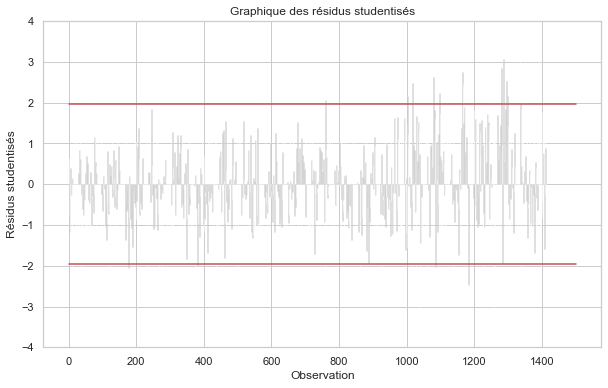

In [39]:
#Le graphique des résidus studentisés

plt.figure(figsize=(10, 6))
plt.bar(analyses['obs'], analyses['rstudent'], color='black', alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-4, 4)  # Ajuster la limite de l'axe des ordonnées pour mieux visualiser les observations
plt.title('Graphique des résidus studentisés')
plt.show()

- Le graphique des résidus studentisés permet d'identifier les observations qui ont une influence disproportionnée sur les résultats d'une régression linéaire.
- En général, un résidu studentisé est considéré comme élevé s'il est supérieur à 2 ou 3 en valeur absolue. 
- On peut donc considérer que les observations n'ont pas une influence disproportionnée sur les résultats de la régression linéaire.

### Détermination de la distance de Cook
Permet également de détecter les observations influentes 

In [40]:
influence = model_reg_multi.get_influence().summary_frame()

In [41]:
#Le seuil de la distance de Cook est de n-p.

analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

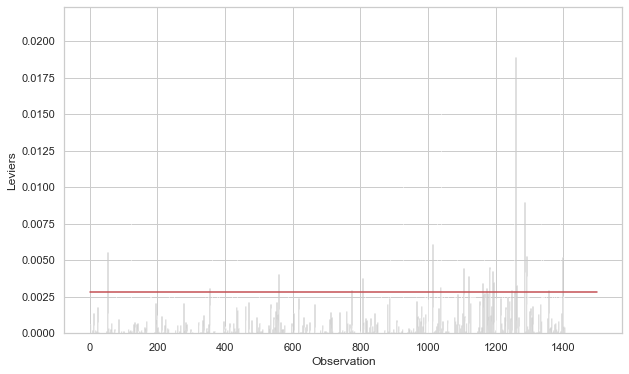

In [42]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'], color='black', alpha=0.5)
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

Malgré le fait qu'on ait détecté plusieurs valeurs qui pourraient être atypiques et influentes, il faut vérifier qu'elles soient véritablement aberrantes pour les retirer.

## Vérification de la distribution normale des résidus

### L'histogramme des erreurs absolues 

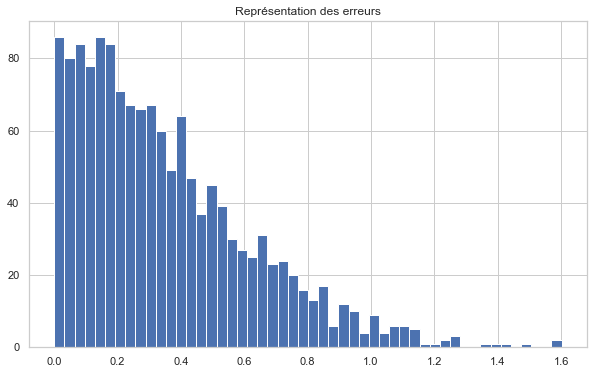

In [43]:
# Représentation des erreurs avec un histogramme
plt.figure(figsize=(10,6))

y_pred = model_reg_multi.predict(X)
erreur_hist = np.abs( y - y_pred)
plt.hist(erreur_hist,bins=50)
plt.title("Représentation des erreurs")
plt.show()

L'histogramme des erreurs absolues permet de voir la répartition des erreurs absolues et de détecter des valeurs aberrantes.
Dans ce cas, l'histogramme semble suivre une distribution normale.

### Histogramme des résidus

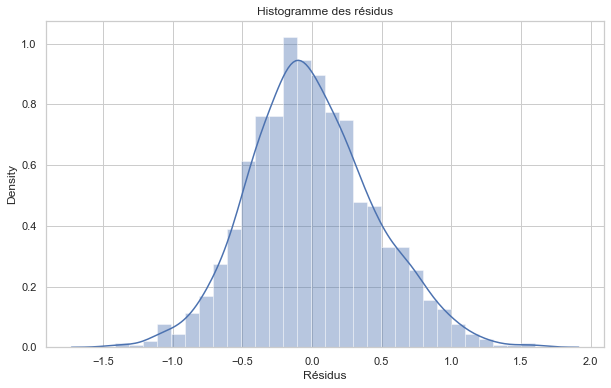

In [44]:
# Affichage de l'histogramme des résidus
plt.figure(figsize=(10,6))

sns.distplot(model_reg_multi.resid)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'histogramme des résidus représente la distribution des résidus. 
- Dans ce cas,La distribution des résidus est centrée autour de 0 et à peu près symétrique. Cela indique que le modèle de régression linéaire est approprié pour les données. 
- l'histogramme semble suivre une distribution normale.


### Test de la normalité des résidus de Shapiro-Wilk

In [45]:
# Test de Shapiro-Wilk
shapiro(model_reg_multi.resid)

ShapiroResult(statistic=0.994949996471405, pvalue=0.00010943715460598469)

- Avec Shapiro, la normalité n'est pas vérifiée car la P-value n'est pas supérieure à 0.05. 
Le test de Shapiro est sensible à la taille de l'échantillon. 
- Il est judicieux d'effectuer un autre test car comme on peut le voir dans l'histogramme des résidus et l'histogramme des erreurs absolues, nous pouvons tout de même suggérer une distribution normale.

### Le graphique quantile-quantile (QQ plot)

Le graphique QQ plot compare les quantiles des résidus avec les quantiles d'une distribution normale. Si les points sont alignés sur une ligne droite, cela suggère que les résidus suivent une distribution normale. Si les points s'écartent de la ligne droite, cela suggère une violation de la normalité.

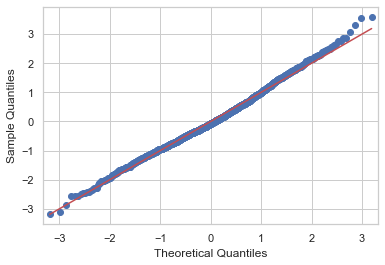

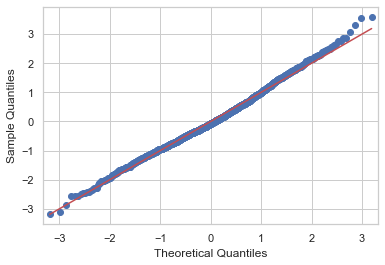

In [46]:
#Graphique du QQ plot
import statsmodels.graphics.gofplots as smg

residus = model_reg_multi.resid
smg.qqplot(residus, line='s', fit=True)

Le graphique QQ plot suggère une distribution normale des résidus car les points semblent alignés sur la droite. 

## Indépendance des résidus 


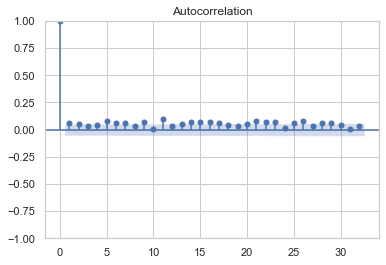

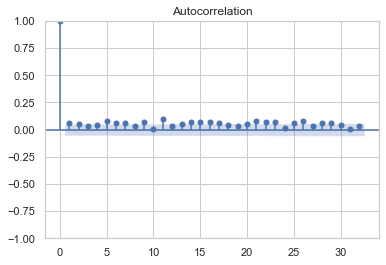

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
#Calcul des résidus du modèle 

residus = model_reg_multi.resid

plot_acf(residus)


Le premier bâtonnet est très élevé, c'est l'auto-corrélation des résidus avec eux-même. Les bâtonnets 2 à n ne dépassent pas la zone bleue. Cela indique l'indépendance des résidus

## Vérification de la linéarité

La relation entre les variables indépendantes et la variable dépendante doit être linéaire.

### Test de Durbin-Watson

In [48]:
# Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
print("Le résultat renvoie", round(durbin_watson(model_reg_multi.resid),3),"et donc pas d'autocorrélation car valeur proche de 2")

Le résultat renvoie 1.879 et donc pas d'autocorrélation car valeur proche de 2


Le Test de Durbin-Watson vérifie à la fois l'indépendance des résidus et la linéarité entre les variables indépendantes et la variable dépendante.

## Vérification de la colinéarité des variables

La colinéarité est un problème courant en régression linéaire qui se produit lorsque deux ou plusieurs variables indépendantes sont fortement corrélées entre elles

In [49]:
#Vérification de la colinéarité des variables
variables = model_reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.013321445424569,
 1.1278264068564212,
 1.2258786450612054,
 1.4001967532105002,
 1.5811655198118686]

Les coefficients sont inférieurs à 10 donc il n'y a pas de problème de colinéarité entre les variables indépendantes

## Homoscédasticité

On vérifie si la dispersion des résidus est constante le long de la plage des valeurs prédites.

Une dispersion constante indique une homoscédasticité, ce qui est souhaitable dans la régression linéaire.

Si la dispersion des résidus augmente ou diminue avec les valeurs prédites, cela peut indiquer une violation de l'hypothèse d'homoscédasticité.

### Test de Breusch-Pagan

Le test de Breusch-Pagan est un test statistique qui permet de vérifier l'homogénéité des résidus. Il teste l'hypothèse nulle selon laquelle la variance des résidus est constante. Si la valeur p du test est supérieure à un seuil prédéfini (par exemple, 0,05), cela suggère une homoscédasticité.

In [50]:
#Test de Breusch Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(model_reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.1614158908147156e-14


Le résultat est inférieur à 0.05 donc l'homoscédasticité des résidus n'est pas vérifiée

Pour résumer, toutes les hypothèses sont vérifiées à part l'homoscédasticité des résidus qui peuvent remettre en question l'utilisation du modèle de régression linéaire.

# Création du df_final avec les données prédites

On utilise le df_manquants qui ne représente que les données pour lesquelles nous avons des données manquantes pour margin_low sans la colonne margin_low que nous complèterons plus tard avec les données prédites


In [51]:
#Affichage du df_manquants des données manquantes sans la coloone margin_low
df_manquants.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length
72,1,171.94,103.89,103.45,3.25,112.79
99,1,171.93,104.07,104.18,3.14,113.08
151,1,172.07,103.80,104.38,3.02,112.93
197,1,171.45,103.66,103.80,3.62,113.27
241,1,171.83,104.14,104.06,3.02,112.36


In [52]:
#Création du dataframe de predictions
#On reprend le df_manquants avec les valeurs manquantes dans lequel on va enlever toutes les variables non significatives

predictions=df_manquants.drop('is_genuine',axis=1)

In [53]:
#On effectue la prédiction 
valeurs_predites=model_reg_multi.predict(predictions)

# Ajout d'une nouvelle colonne margin_low_predites avec les valeurs prédites
df_manquants['margin_low_predites']=valeurs_predites

In [54]:
#La colonne margin_low_predites a bien été ajoutée dans le df_manquants (avec seulement les données manquantes)
df_manquants.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low_predites
72,1,171.94,103.89,103.45,3.25,112.79,4.301381
99,1,171.93,104.07,104.18,3.14,113.08,4.372654
151,1,172.07,103.80,104.38,3.02,112.93,4.383456
197,1,171.45,103.66,103.80,3.62,113.27,4.310763
241,1,171.83,104.14,104.06,3.02,112.36,4.613224


In [55]:
#On copie le df original et on remplace margin_low par margin_low_predites 
df_final= df.copy()
df_final.loc[df_manquants.index, 'margin_low'] = df_manquants['margin_low_predites']
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


# Analyse exploratoire du data_final

In [56]:
#Affichage des caractéristiques 
df_final.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482899,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659412,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<Figure size 576x576 with 0 Axes>

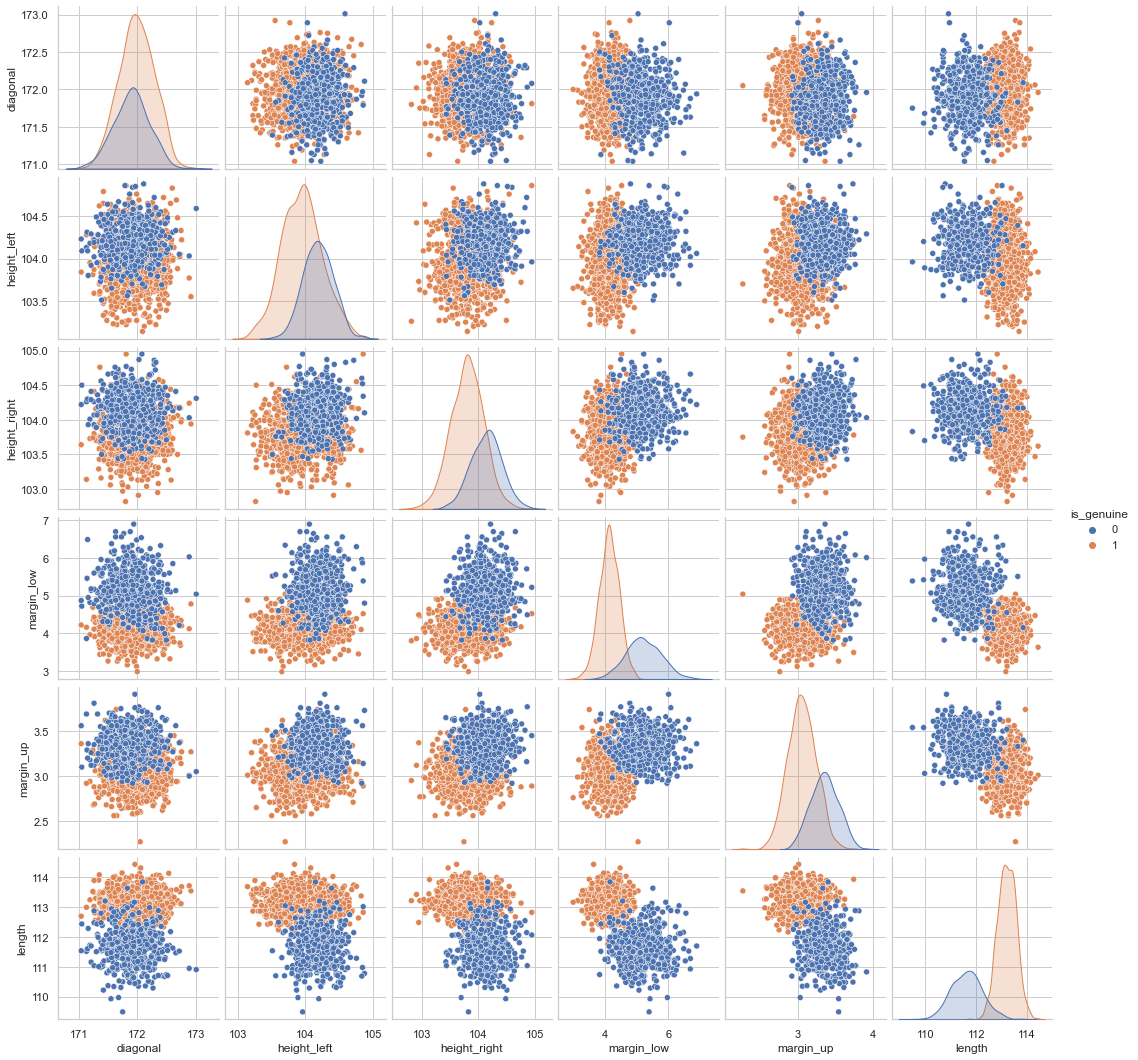

In [57]:
#Affichage de la matrice de diagrammes de dispersion

fig = plt.figure(figsize=(8, 8))

sns.pairplot(df_final, hue='is_genuine')
plt.show();

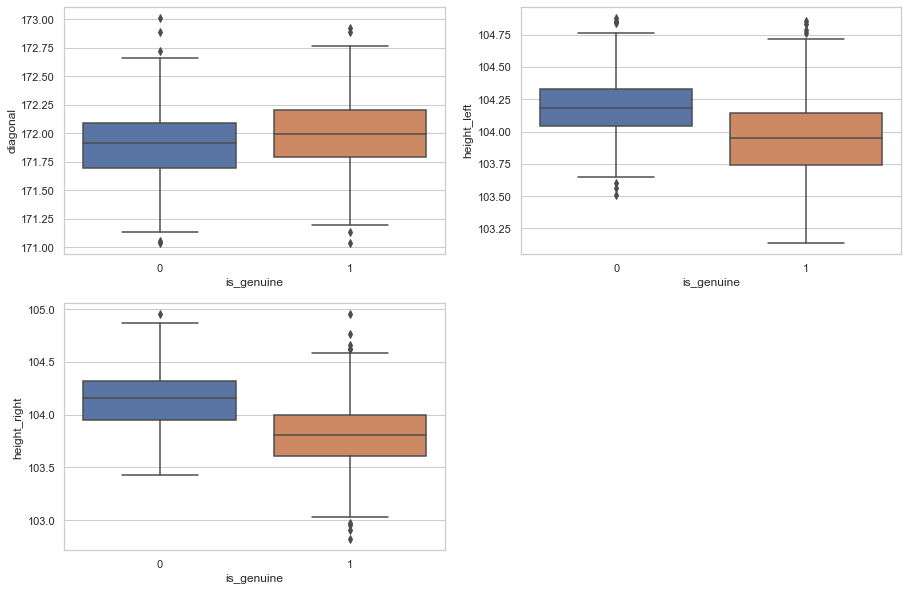

In [58]:
# Affichages des boxplots 
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="diagonal", data=df_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="height_left", data=df_final)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="height_right", data=df_final);


<AxesSubplot:xlabel='is_genuine', ylabel='length'>

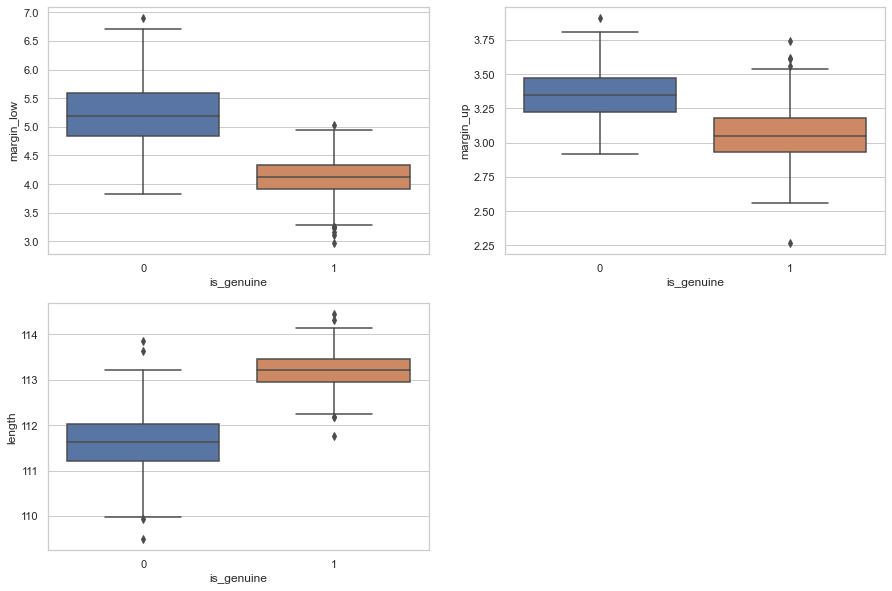

In [59]:
# Affichages des boxplots 
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(x="is_genuine", y="margin_low", data=df_final)
plt.subplot(222)
sns.boxplot(x="is_genuine", y="margin_up", data=df_final)
plt.subplot(223)
sns.boxplot(x="is_genuine", y="length", data=df_final)

On remarque une grande différence de variance entre les vrais et faux billets pour toutes les variables. La différence est moins nette pour diagonal

# Analyse de la variance avec ANOVA à 1 facteur

On cherche à savoir si les variables ont une influence sur l'authenticité des billets de banque. On réalise une ANOVA à 1 facteur

En régression linéaire multiple, l'ANOVA permet de tester si l'ensemble des variables explicatives influent de façon significative sur la variable dépendante

## Test de Fischer

Le test de Fischer permet d'analyser la variance

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Liste des variables à inclure dans l'ANOVA
variables = ['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']

# Boucle pour effectuer l'ANOVA pour chaque variable
for i in variables:
    # Création du modèle ANOVA
    model = ols('{} ~ is_genuine'.format(i), data=df_final).fit()
    # Effectuer l'ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    # Affichage du résultat
    print('ANOVA for {}:'.format(i))
    display(anova_table)

ANOVA for diagonal:


,sum_sq,df,F,PR(>F)
is_genuine,2.460749,1.0,26.874763,2.466867e-07
Residual,137.162201,1498.0,NaN,NaN


ANOVA for height_left:


,sum_sq,df,F,PR(>F)
is_genuine,19.394088,1.0,252.558393,1.126916e-52
Residual,115.032185,1498.0,NaN,NaN


ANOVA for height_right:


,sum_sq,df,F,PR(>F)
is_genuine,37.401634,1.0,460.974212,2.270856e-89
Residual,121.541825,1498.0,NaN,NaN


ANOVA for margin_low:


,sum_sq,df,F,PR(>F)
is_genuine,400.020183,1.0,2379.968951,1.031937e-311
Residual,251.780694,1498.0,NaN,NaN


ANOVA for margin_up:


,sum_sq,df,F,PR(>F)
is_genuine,29.607294,1.0,870.581394,3.144530e-151
Residual,50.944950,1498.0,NaN,NaN


ANOVA for length:


,sum_sq,df,F,PR(>F)
is_genuine,823.507935,1.0,3876.654138,0.0
Residual,318.216390,1498.0,NaN,NaN


- La p-valeur de ce test est très petite et largement inférieure à 5 %. 
- On rejette donc l'hypothèse H0 selon laquelle α1=α2=α3=α4=α5=α6=0. 
- Les variables sont probablement dépendantes de l'authenticité des billets.

In [61]:
# Sauvegarde du df_final dans un fichier CSV
df_final.to_csv('df_final.csv', index=False)